In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

Pre-process full dataset to remove rows with less than 3 reviews and those with missing geographic information

In [2]:
df_restaurant = pd.read_csv("data/full_restaurant_rating_data.csv")
df_is_in_mall = pd.read_csv("data/restaurant_is_in_mall.csv")
df_walking_duration_from_station_exit = pd.read_csv("data/restaurant_walking_distance_from_station_exit.csv")
df_restaurant_nearest_exit = pd.read_csv('data/restaurant_nearest_station_exit.csv')
df_reviews = pd.read_csv('data/full_restaurant_review_data.csv', parse_dates=['date'])

In [3]:
# Merge all the Scraped Datasets into Restaurant Dataset
df_restaurant = df_restaurant.merge(df_is_in_mall[['url', 'is_in_mall', 'mall']], on='url', how='left')
df_restaurant = df_restaurant.merge(df_walking_duration_from_station_exit, on='url', how='left')
df_rating = df_restaurant.merge(df_restaurant_nearest_exit[['station_name', 'station_line_color', 'url', 'distance']], on='url', how='left')

In [4]:
# dropping rows with reviews <= 2: dropping 3935 rows of data
df_rating = df_rating[df_rating['num_of_reviews'] >= 3]
df_rating.shape

(7226, 42)

In [5]:
df_rating = df_rating.dropna(subset=['walking_distance'])
df_rating.shape

(7192, 42)

In [6]:
df_rating.columns

Index(['name', 'address', 'region', 'latitude', 'longitude',
       'nearby_attraction', 'distance_from_attraction', 'price_category',
       'price_range', 'mon_operating_hours', 'tue_operating_hours',
       'wed_operating_hours', 'thu_operating_hours', 'fri_operating_hours',
       'sat_operating_hours', 'sun_operating_hours', 'is_travellors_choice',
       'is_michellin', 'about', 'list_of_meals', 'list_of_cuisines',
       'list_of_features', 'list_of_special_diets', 'num_of_reviews',
       'num_of_rating_1', 'num_of_rating_2', 'num_of_rating_3',
       'num_of_rating_4', 'num_of_rating_5', 'food_rating', 'service_rating',
       'value_rating', 'atmosphere_rating', 'overall_rating', 'url',
       'is_in_mall', 'mall', 'walking_distance', 'walking_duration',
       'station_name', 'station_line_color', 'distance'],
      dtype='object')

### 1. Exploratory Data Analysis - Price Category

Looking at the various price categories that exist in the dataset

In [7]:
df_rating['price_category'].unique()

array(['mid range', 'fine dining', 'cheap eats', nan], dtype=object)

#### 1.1 Proportions of Price Category including Nulls in dataset

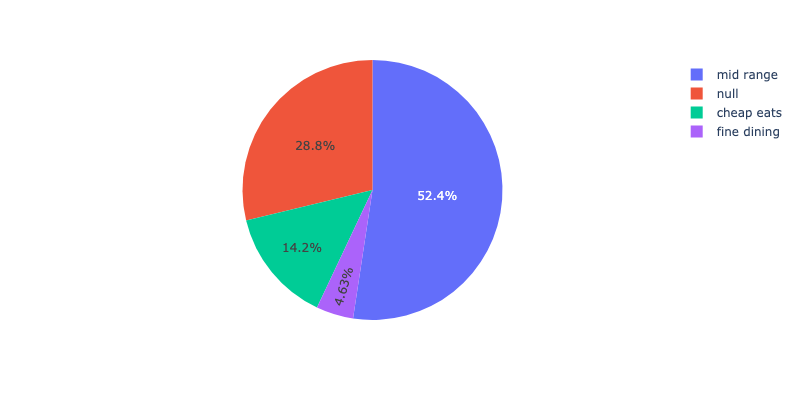

In [8]:
price_category_count = df_rating['price_category'].value_counts(dropna=False)
price_category_fig = px.pie(price_category_count, names=price_category_count.index, values='price_category', width=800, height=400)
# price_category_fig.show()

price_category_fig.show("png")

#### 1.2 Proportions of Price Category excluding Nulls in dataset

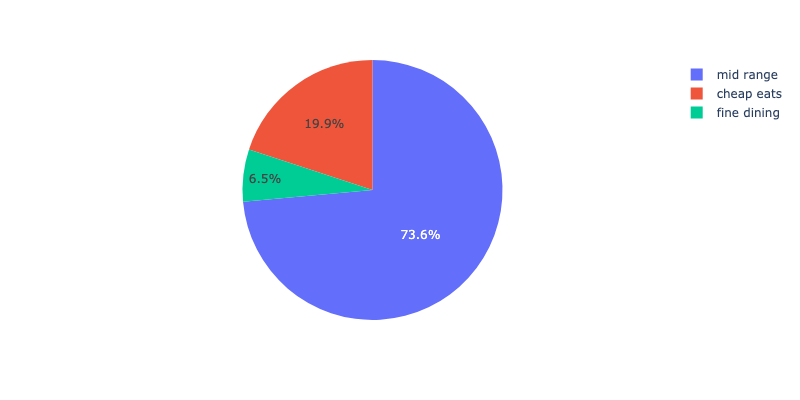

In [9]:
price_category_count_dropna = df_rating['price_category'].value_counts()
price_category_fig = px.pie(price_category_count_dropna, names=price_category_count_dropna.index, values='price_category', width=800, height=400)
# price_category_fig.show()

price_category_fig.show("png")